In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('delhivery.csv')

In [3]:
df_cleaned = df.drop(columns=['source_name', 'destination_name'])

In [4]:
numerics = df_cleaned.select_dtypes(include=[np.number])

In [5]:
X = numerics.drop(columns=['actual_time'])
y = numerics['actual_time']

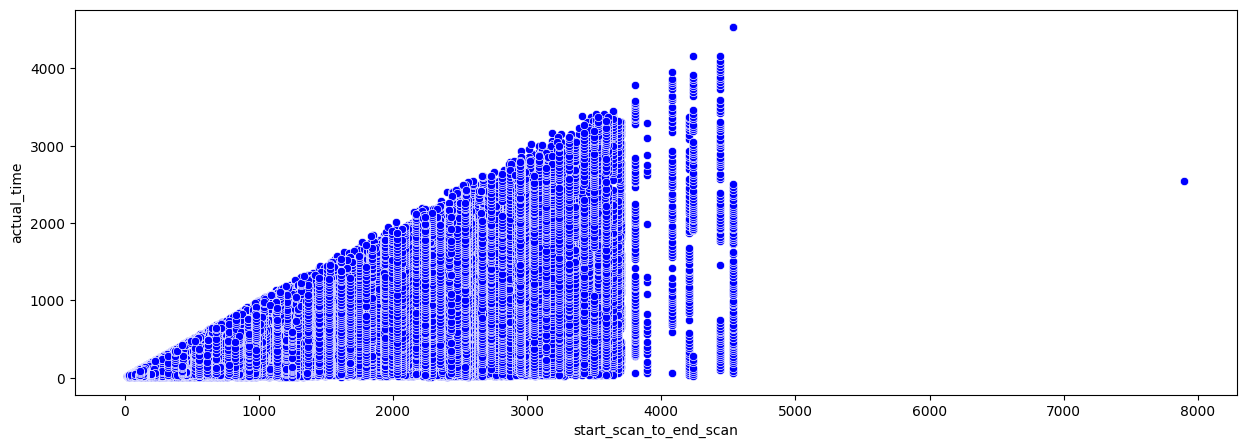

In [6]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=X.iloc[:, 0], y=y, color='blue')
plt.xlabel(X.columns[0])
plt.ylabel('actual_time')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)

StandardScaler()

In [9]:
ss.transform(X_test)

array([[-0.05987723,  0.02585862,  0.02553574, ...,  0.09720659,
         0.21481348, -0.10410781],
       [-0.70200443, -0.59705291, -0.5994888 , ..., -0.62796645,
        -0.6865152 , -0.20111468],
       [-0.55352457, -0.25807314, -0.26113398, ..., -0.82574092,
        -0.77595424, -0.04319653],
       ...,
       [-0.63451359, -0.42031987, -0.42293353, ...,  0.09720659,
         0.29631767, -0.03304465],
       [-0.85241261, -0.64920364, -0.65132054, ..., -0.69389127,
        -0.71460945,  0.00756288],
       [ 2.17792642,  3.78650589,  3.7945798 , ...,  2.27272571,
         1.44038237, -0.3573302 ]])

In [10]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [11]:
r=Ridge(alpha=0.1)
r.fit(X_train,y_train)

Ridge(alpha=0.1)

In [12]:
r.score(X_test,y_test)*100

97.09235322793882

In [30]:
l=Lasso(alpha=0.01,max_iter=6000)
l.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=6000)

In [31]:
l.score(X_test,y_test)*100

97.0795324571373

In [28]:
en=ElasticNet(alpha=0.01, max_iter=6000)
en.fit(X_train,y_train)

ElasticNet(alpha=0.01, max_iter=6000)

In [32]:
en.score(X_test,y_test)*100

97.07955507991743

In [33]:
y_pred = r.predict(X_test)
y_predi = l.predict(X_test)
y_prediction = en.predict(X_test)

In [34]:
ri=mean_absolute_error(y_test, y_pred)
ri

48.77090411788129

In [35]:
la=mean_absolute_error(y_test, y_predi)
la

48.46408499526618

In [36]:
elastic=mean_absolute_error(y_test, y_prediction)
elastic

48.461277557386914

In [37]:
ri=mean_squared_error(y_test, y_pred)
ri

10409.432310949878

In [38]:
la=mean_squared_error(y_test, y_predi)
la

10455.330921164483

In [39]:
elastic=mean_squared_error(y_test, y_prediction)
elastic

10455.249931169234

In [40]:
rmse = np.sqrt(ri)
print(rmse)

102.0266255001599


In [41]:
rootmeansquareerror = np.sqrt(la)
print(rootmeansquareerror)

102.25131256450688


In [42]:
root_mean_squared_error= np.sqrt(elastic)
print(root_mean_squared_error)

102.25091652972718
